# Analyse av data fra fagdagen

Først, la oss definere funskjoner for gjennomsnitt og standardavvik. Disse er gitt ved:

\begin{equation*}
\bar{x} = \frac{1}{n} \sum_k a_k
\end{equation*}

og

\begin{equation*}
\sigma = \sqrt{\frac{1}{n} \sum_k (a_k - \bar{x})^2}
\end{equation*}

In [1]:
def average(my_list):
  return sum(my_list) / len(my_list)

def deviation(my_list):
  avg = average(my_list)
  deviation_list = [(value - avg)**2 for value in my_list]
  return sqrt(average(deviation_list))

Så, la oss plotte dataen, samt regne ut snitt, standardavvik og regresjon.

average temp: 17.27°C
temp std: 9.86°C
Regresjonen
           5             4             3            2
9.756e-11 x - 9.663e-08 x + 3.485e-05 x - 0.005095 x + 0.1332 x + 31.03


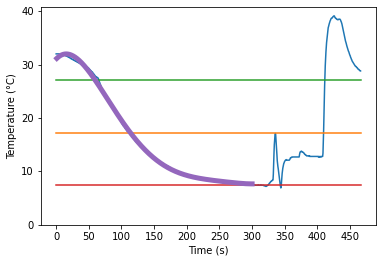

In [9]:
import csv
from pylab import *
import numpy

time_key = 'Time (s) Run 2'
temp_key = 'Temperature (Â°C) Run 2'

dt = 0.5
regression_to = 300

with open('data.csv') as f:
    reader = csv.DictReader(f)
    dics = [dic for dic in reader]
  
    n = len(dics)
    end_time = round(float(dics[-1][time_key]))

    times = [float(dic[time_key]) for dic in dics]
    temps = [float(dic[temp_key]) for dic in dics]

    avg_temp = round(average(temps), 2)
    std_temp = round(deviation(temps), 2)

    to_index = round(regression_to / dt)
    regression = numpy.poly1d(numpy.polyfit(times[:to_index], temps[:to_index], 5))

    print(f'average temp: {avg_temp}°C')
    print(f'temp std: {std_temp}°C')

    print('Regresjonen')
    print(regression)

    regression_eval = numpy.linspace(1, regression_to, regression_to * 10)

    plot(times, temps)
    plot(times, [avg_temp for _ in dics])
    plot(times, [avg_temp + std_temp for _ in dics])
    plot(times, [avg_temp - std_temp for _ in dics])

    plot(regression_eval, regression(regression_eval), linewidth=5)

    xlabel('Time (s)')
    ylabel('Temperature (°C)')
    xticks(range(0, end_time, 50))
    yticks(range(0, 50, 10))

    show()

Merk:
- den oransje linjen sier hva gjennomsnittet var
- den blå linjen (den originale dataen) holder seg stort sett mellom den grønne og den røde linjen, ettersom at disse representerer standardavvikene
- den lilla linjen er en representasjon av regresjonen. Du ser at den passer godt til dataen siden den fullstendig blokkerer den.

Dette forteller oss at gjennomsnittet temperaturen er 17.27
Og at temperaturen varierte med ca. 9.86 fra gjennomsnittet

Regresjonen forteller oss ingenting om hvor vi kommer til å legge termometeret i framtiden

